In [1]:
!pip install web3

from web3 import Web3
import json





In [2]:
# Connect to Ganache
ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Check if connected
print("Connected:", web3.is_connected())


Connected: True


In [5]:
# Set default account
web3.eth.default_account = web3.eth.accounts[0]

# Load ABI
with open("BlockchainDNS_abi1.json", "r") as file:
    abi = json.load(file)

# Set contract address
contract_address = "0x69c968b42c7566248ef50d66AaA794c954626719"

# Connect to contract
contract = web3.eth.contract(address=contract_address, abi=abi)

In [7]:
domain = "myweb3site34.eth"
dns_record = "ipfs://bafkreidlrghkkrmpigf5bd5wjtcrtsakaok4ivcztryzshm4xtik7iplyy"

tx_hash = contract.functions.registerDomain(domain, dns_record).transact()
receipt = web3.eth.wait_for_transaction_receipt(tx_hash)

print("Domain registered. Tx Hash:", tx_hash.hex())


Domain registered. Tx Hash: 4038ccfb9e6c2f26d9a51279aa6b41061bee40651f273754f6e35ecba447e04a


In [9]:
# Lease a domain:
lessee_address = "0x6354F4B01F6B660fC6F390e013dAF88f97CE4cAD"
duration = 86400  # 1 day (in seconds)

tx_hash = contract.functions.leaseDomain(1, lessee_address, duration).transact() #here i have given token id =1 , 1st parameter
receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
print("Lease transaction confirmed:", receipt.transactionHash.hex())



Lease transaction confirmed: 81ce298134c1b2e78d503a5658502219524caa679eba53bdaf0266b23afbc6ee


In [11]:
domain = "myweb3site56.eth"
dns_record = "ipfs://yourCIDhere"

tx_hash = contract.functions.registerDomain(domain, dns_record).transact()
receipt = web3.eth.wait_for_transaction_receipt(tx_hash)

print("Domain registered. Tx Hash:", tx_hash.hex())


Domain registered. Tx Hash: 15c753400eb6627ddb3830638e08d8f6b50cfb9a3a99757fecccd26831743f20


In [13]:
token_id = 1  # Replace with actual token ID
lessee_address = web3.eth.accounts[1]  # For example, another Ganache account
duration = 60 * 60 * 24  # 1 day in seconds

tx_hash = contract.functions.leaseDomain(token_id, lessee_address, duration).transact()
receipt = web3.eth.wait_for_transaction_receipt(tx_hash)

print("Domain leased. Tx Hash:", tx_hash.hex())


Domain leased. Tx Hash: b76e321c19741c97d97c9cc46884562a053136b3e313ff745545f48920ed3cdc


In [15]:
token_id = 1
new_dns = "ipfs://newCIDhere"

# Switch to lessee account if needed
web3.eth.default_account = web3.eth.accounts[1]  # If the lessee is making the update

tx_hash = contract.functions.updateDNSRecord(token_id, new_dns).transact()
receipt = web3.eth.wait_for_transaction_receipt(tx_hash)

print("DNS record updated. Tx Hash:", tx_hash.hex())


DNS record updated. Tx Hash: 909b11dcbce694119ff9505a3b4d90c3208a28519bfd2ed2c903249e8799549b


In [17]:
token_id = 1
web3.eth.default_account = web3.eth.accounts[0]  # Owner

tx_hash = contract.functions.endLease(token_id).transact()
receipt = web3.eth.wait_for_transaction_receipt(tx_hash)

print("Lease ended. Tx Hash:", tx_hash.hex())


Lease ended. Tx Hash: 584905ef26ca71bd5e78d81a5bb17cbe77a45bdacb3a9c4652c8d76167e7940c


In [19]:
print("Connected:", web3.is_connected())
print("Contract address code size:", len(web3.eth.get_code(contract.address)))


Connected: True
Contract address code size: 0


In [32]:
import pandas as pd
from datetime import datetime

# Example token IDs to check
token_ids = [0, 1, 2]  # Replace with actual minted token IDs

data = []

for token_id in token_ids:
    leased = contract.functions.isLeased(token_id).call()
    lessee = contract.functions.getLessee(token_id).call()
    lease_info = contract.functions.leases(token_id).call()
    dns = contract.functions.dnsRecords(token_id).call()

    start = datetime.utcfromtimestamp(lease_info[1]).strftime('%Y-%m-%d %H:%M:%S') if lease_info[1] != 0 else 'N/A'
    end = datetime.utcfromtimestamp(lease_info[2]).strftime('%Y-%m-%d %H:%M:%S') if lease_info[2] != 0 else 'N/A'

    data.append({
        "Token ID": token_id,
        "Is Leased": leased,
        "Lessee": lessee,
        "Lease Start": start,
        "Lease End": end,
        "DNS Record": dns
    })

# Create DataFrame
df = pd.DataFrame(data)
print(df)


BadFunctionCallOutput: Could not transact with/call contract function, is contract deployed correctly and chain synced?

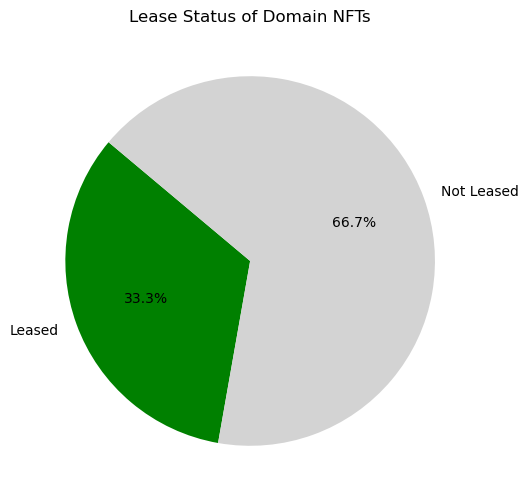

In [21]:
import matplotlib.pyplot as plt

# Example data
leased_status = [1, 0, 0]  # 1 means leased, 0 means not leased

leased_count = sum(leased_status)
not_leased_count = len(leased_status) - leased_count

plt.figure(figsize=(6, 6))
plt.pie([leased_count, not_leased_count], labels=['Leased', 'Not Leased'], autopct='%1.1f%%', startangle=140, colors=["green", "lightgray"])
plt.title('Lease Status of Domain NFTs')
plt.show()


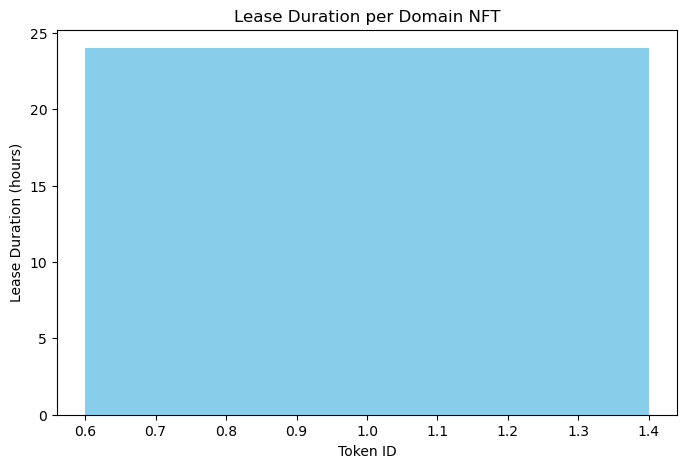

In [36]:
import matplotlib.pyplot as plt
from datetime import datetime

# Example data
token_ids = [1]
start_times = ["2025-06-12 04:41:47"]
end_times = ["2025-06-13 04:41:47"]

# Calculate durations in hours
durations = [
    (datetime.strptime(end, "%Y-%m-%d %H:%M:%S") - datetime.strptime(start, "%Y-%m-%d %H:%M:%S")).total_seconds() / 3600
    for start, end in zip(start_times, end_times)
]

plt.figure(figsize=(8, 5))
plt.bar(token_ids, durations, color='skyblue')
plt.xlabel('Token ID')
plt.ylabel('Lease Duration (hours)')
plt.title('Lease Duration per Domain NFT')
plt.show()


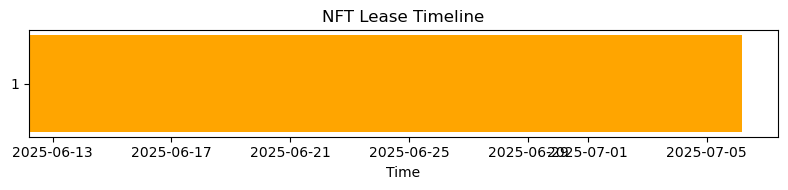

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
df = pd.DataFrame({
    "Token ID": [1],
    "Lease Start": [pd.to_datetime("2025-06-12 04:41:47")],
    "Lease End": [pd.to_datetime("2025-06-13 04:41:47")]
})

# Plot
fig, ax = plt.subplots(figsize=(8, 2))
for idx, row in df.iterrows():
    ax.barh(str(row["Token ID"]), (row["Lease End"] - row["Lease Start"]).total_seconds() / 3600,
            left=row["Lease Start"], color='orange')

ax.set_xlabel("Time")
ax.set_title("NFT Lease Timeline")
plt.tight_layout()
plt.show()


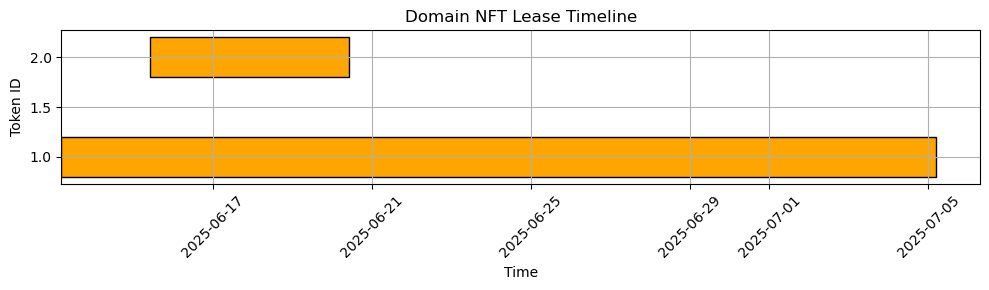

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample lease data (you can pull this dynamically from your smart contract)
leases = [
    {"Token ID": 1, "Start": "2025-06-13 04:41:47", "End": "2025-07-05 04:41:47"},
    {"Token ID": 2, "Start": "2025-06-15 10:00:00", "End": "2025-06-20 10:00:00"},
]

# Convert to datetime objects
for lease in leases:
    lease["Start"] = datetime.strptime(lease["Start"], "%Y-%m-%d %H:%M:%S")
    lease["End"] = datetime.strptime(lease["End"], "%Y-%m-%d %H:%M:%S")

fig, ax = plt.subplots(figsize=(10, 3))

for lease in leases:
    ax.barh(y=lease["Token ID"],
            width=lease["End"] - lease["Start"],
            left=lease["Start"],
            height=0.4,
            align='center',
            color='orange',
            edgecolor='black')

# Formatting
ax.set_xlabel("Time")
ax.set_ylabel("Token ID")
ax.set_title("Domain NFT Lease Timeline")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


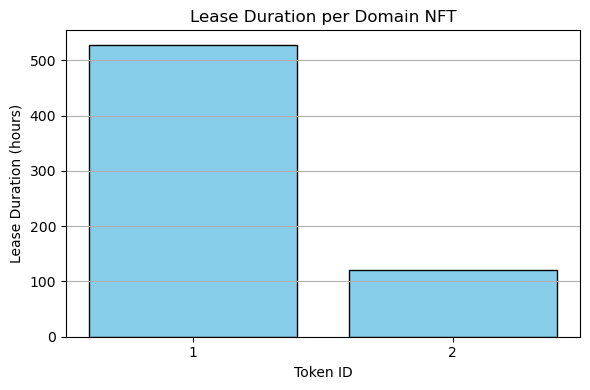

In [42]:
import matplotlib.pyplot as plt
from datetime import datetime

# Sample lease data
leases = [
    {"Token ID": 1, "Start": "2025-06-13 04:41:47", "End": "2025-07-05 04:41:47"},
    {"Token ID": 2, "Start": "2025-06-15 10:00:00", "End": "2025-06-20 10:00:00"},
]

# Calculate durations in hours
durations = []
token_ids = []

for lease in leases:
    start = datetime.strptime(lease["Start"], "%Y-%m-%d %H:%M:%S")
    end = datetime.strptime(lease["End"], "%Y-%m-%d %H:%M:%S")
    duration_hours = (end - start).total_seconds() / 3600
    durations.append(duration_hours)
    token_ids.append(lease["Token ID"])

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(token_ids, durations, color='skyblue', edgecolor='black')
plt.xlabel("Token ID")
plt.ylabel("Lease Duration (hours)")
plt.title("Lease Duration per Domain NFT")
plt.xticks(token_ids)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


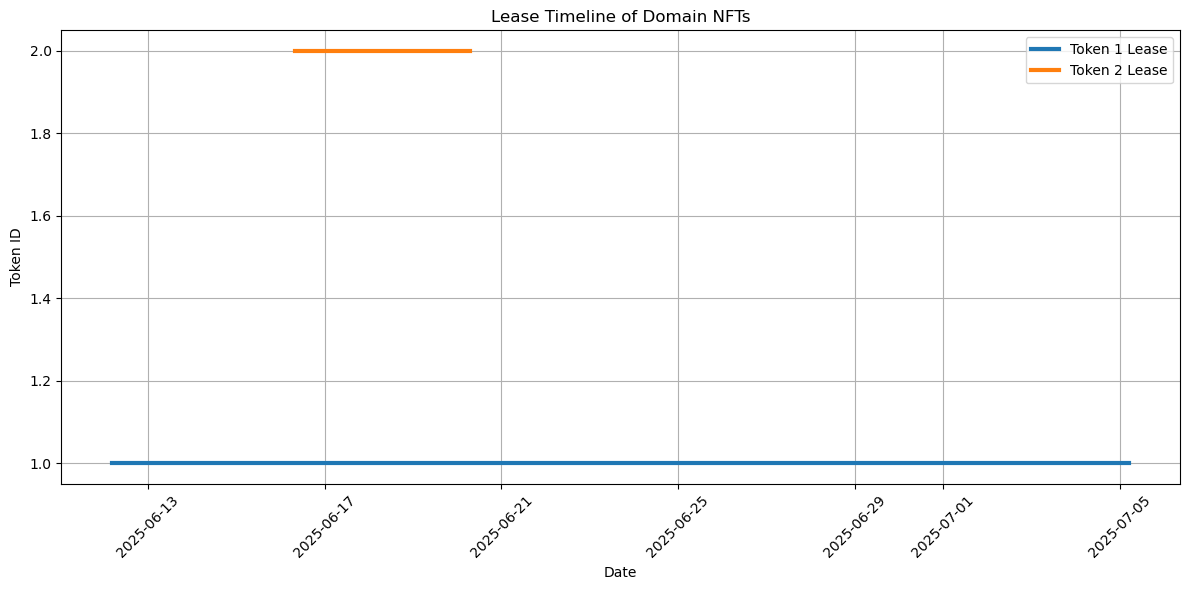

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Sample data
data = {
    "Token ID": [1, 2],
    "Lease Start": ["2025-06-12 04:41:47", "2025-06-16 08:00:00"],
    "Lease End": ["2025-07-05 05:00:00", "2025-06-20 07:00:00"],
    "Is Leased": [True, False]
}

df = pd.DataFrame(data)

# Convert to datetime
df["Lease Start"] = pd.to_datetime(df["Lease Start"])
df["Lease End"] = pd.to_datetime(df["Lease End"])

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

# Plot lease durations as lines (like the example)
for idx, row in df.iterrows():
    ax.plot([row["Lease Start"], row["Lease End"]],
            [row["Token ID"], row["Token ID"]],
            label=f"Token {row['Token ID']} Lease",
            linewidth=3)

# Format
ax.set_xlabel("Date")
ax.set_ylabel("Token ID")
ax.set_title("Lease Timeline of Domain NFTs")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
